In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Question 1

In [2]:
# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Select 1000 random indices
random_indices = np.random.choice(len(x_train), 1000, replace=False)

# Select 1000 random images from the dataset
random_images = x_train[random_indices]

print("Shape of randomly selected 1000 images:", random_images.shape)
# random_images

Shape of randomly selected 1000 images: (1000, 28, 28)


## Question 2

In [3]:
# Flatten the images from 28x28 to a 1D array of size 784
flattened_images = random_images.reshape((1000, -1))

# Performing PCA with 95% variance
pca = PCA(n_components=0.95)

reduced_images = pca.fit_transform(flattened_images)

# Inverse transform to obtain the reconstructed images
reconstructed_images = pca.inverse_transform(reduced_images)

# Reshape the reconstructed images to their original shape
reconstructed_images = reconstructed_images.reshape((1000, 28, 28))
# reconstructed_images

## Question 3

In [4]:
print(f"Number of principal components needed: {pca.n_components_}")

Number of principal components needed: 132


## Question 4

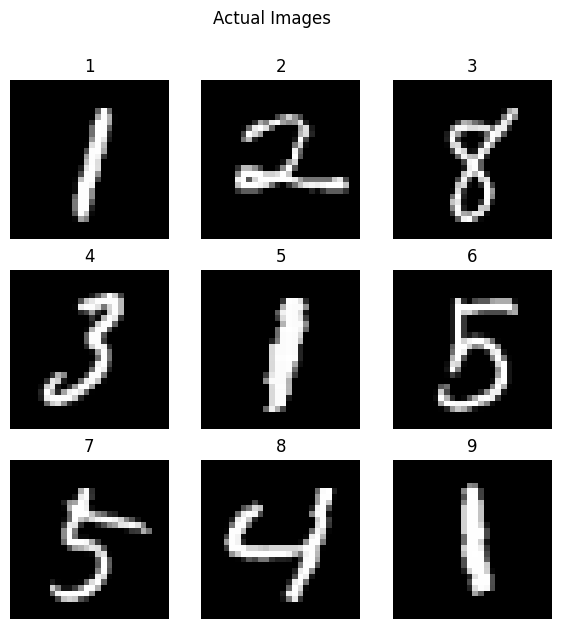

In [5]:
# Plot 9 actual images in a 3x3 grid
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(i + 1)
    plt.axis('off')

plt.suptitle("Actual Images")
plt.show()

## Question 5

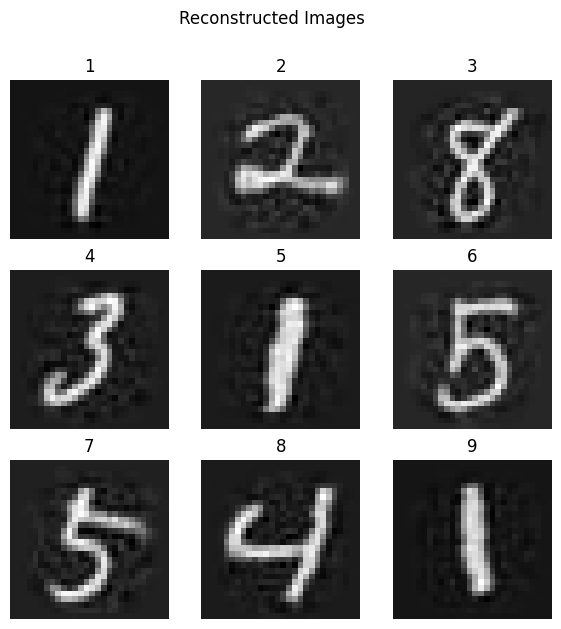

In [6]:
# PPlot the above images after dimensionality reduction in the same pattern
plt.figure(figsize=(7, 7))
for i in range(9):
    # Reconstructed Image
    plt.subplot(3, 3, i + 1 ) 
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(i + 1)
    plt.axis('off')
    
plt.suptitle("Reconstructed Images")
plt.show()

## Question 6

In [7]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# cumulative_explained_variance

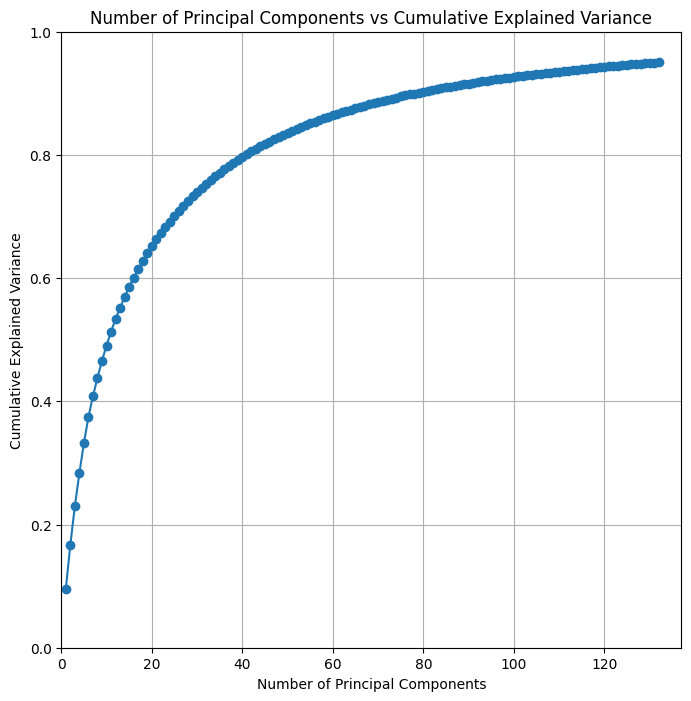

In [8]:
# Plot the graph
plt.figure(figsize=(8,8))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0,len(cumulative_explained_variance)+5)
plt.ylim(0,1)
plt.title('Number of Principal Components vs Cumulative Explained Variance')
plt.grid(True)
plt.show()